# Firebaseのセットアップと静的コンテンツデプロイのメモ

> [Firebase Realtime Database \-FirebaseのRealtime Databaseでチャットアプリを作成するまで\-](https://tech.airis0.com/blog/firebase-realtime-database/) を参考に、やってみたときのメモです

- toc: true
- badges: false
- comments: false
- categories: [firebase,]

## プロジェクトの作成

1. [Firebase](https://firebase.google.com/)にアクセスする
2. コンソールへ移動をクリック
  - Googleアカウントにログインしていると、右上にアカウントのアイコンが表示される
  - 複数のアカウントを所有している場合は、意図したアカウントか確認しておく
  - ログインしていない場合は右上にログインと表示されるので、クリックしてログインする

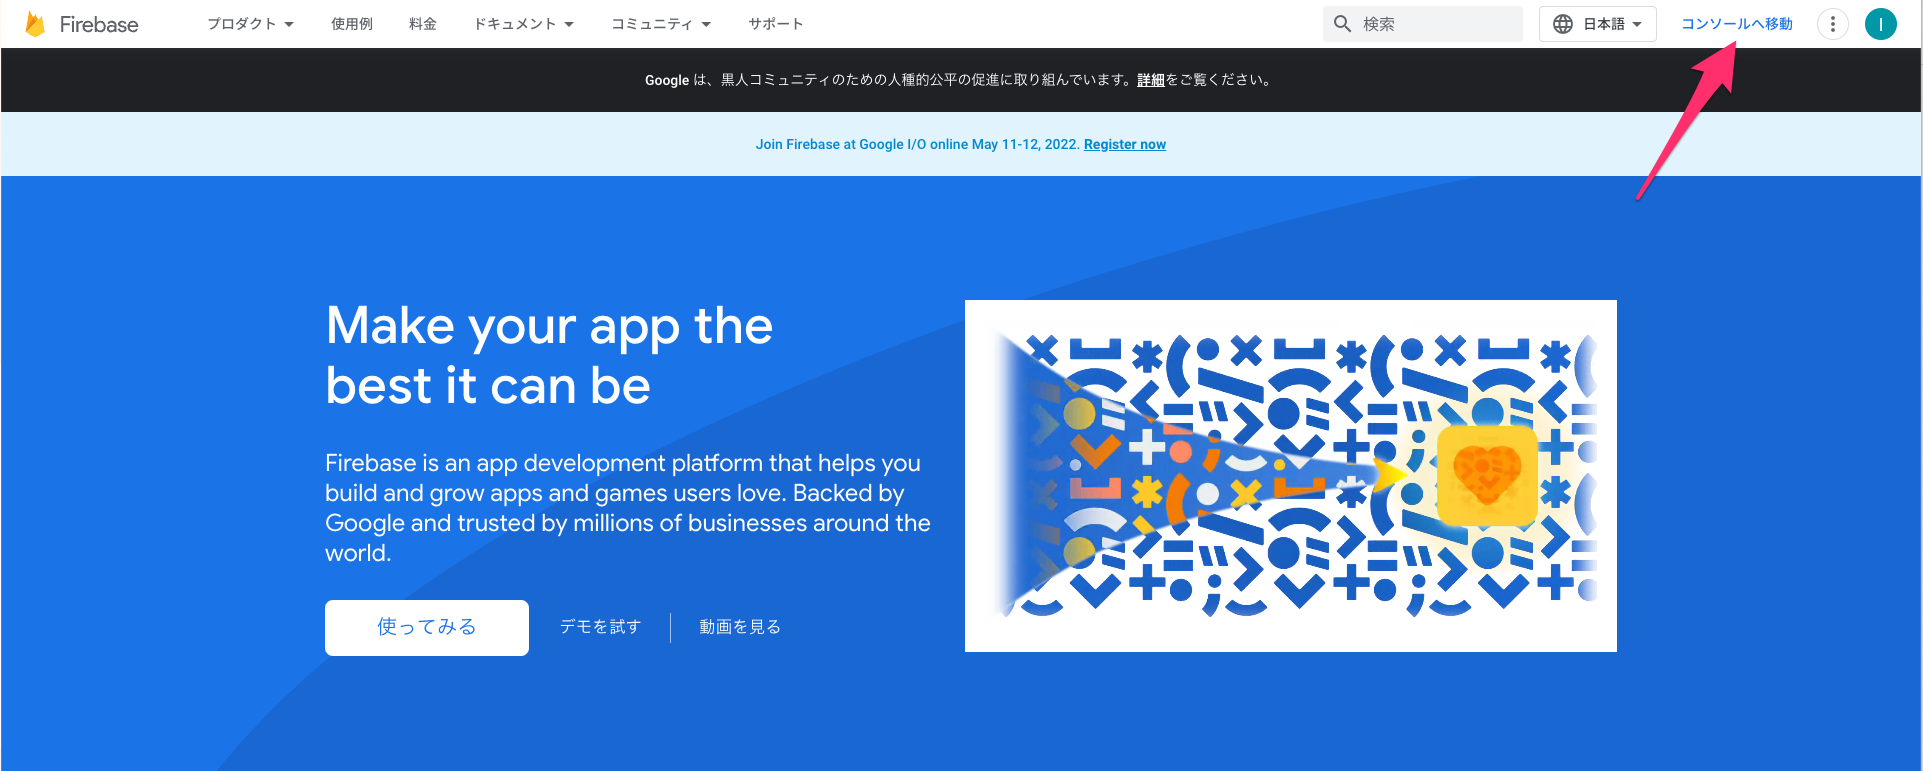

3. プロジェクトを追加をクリック

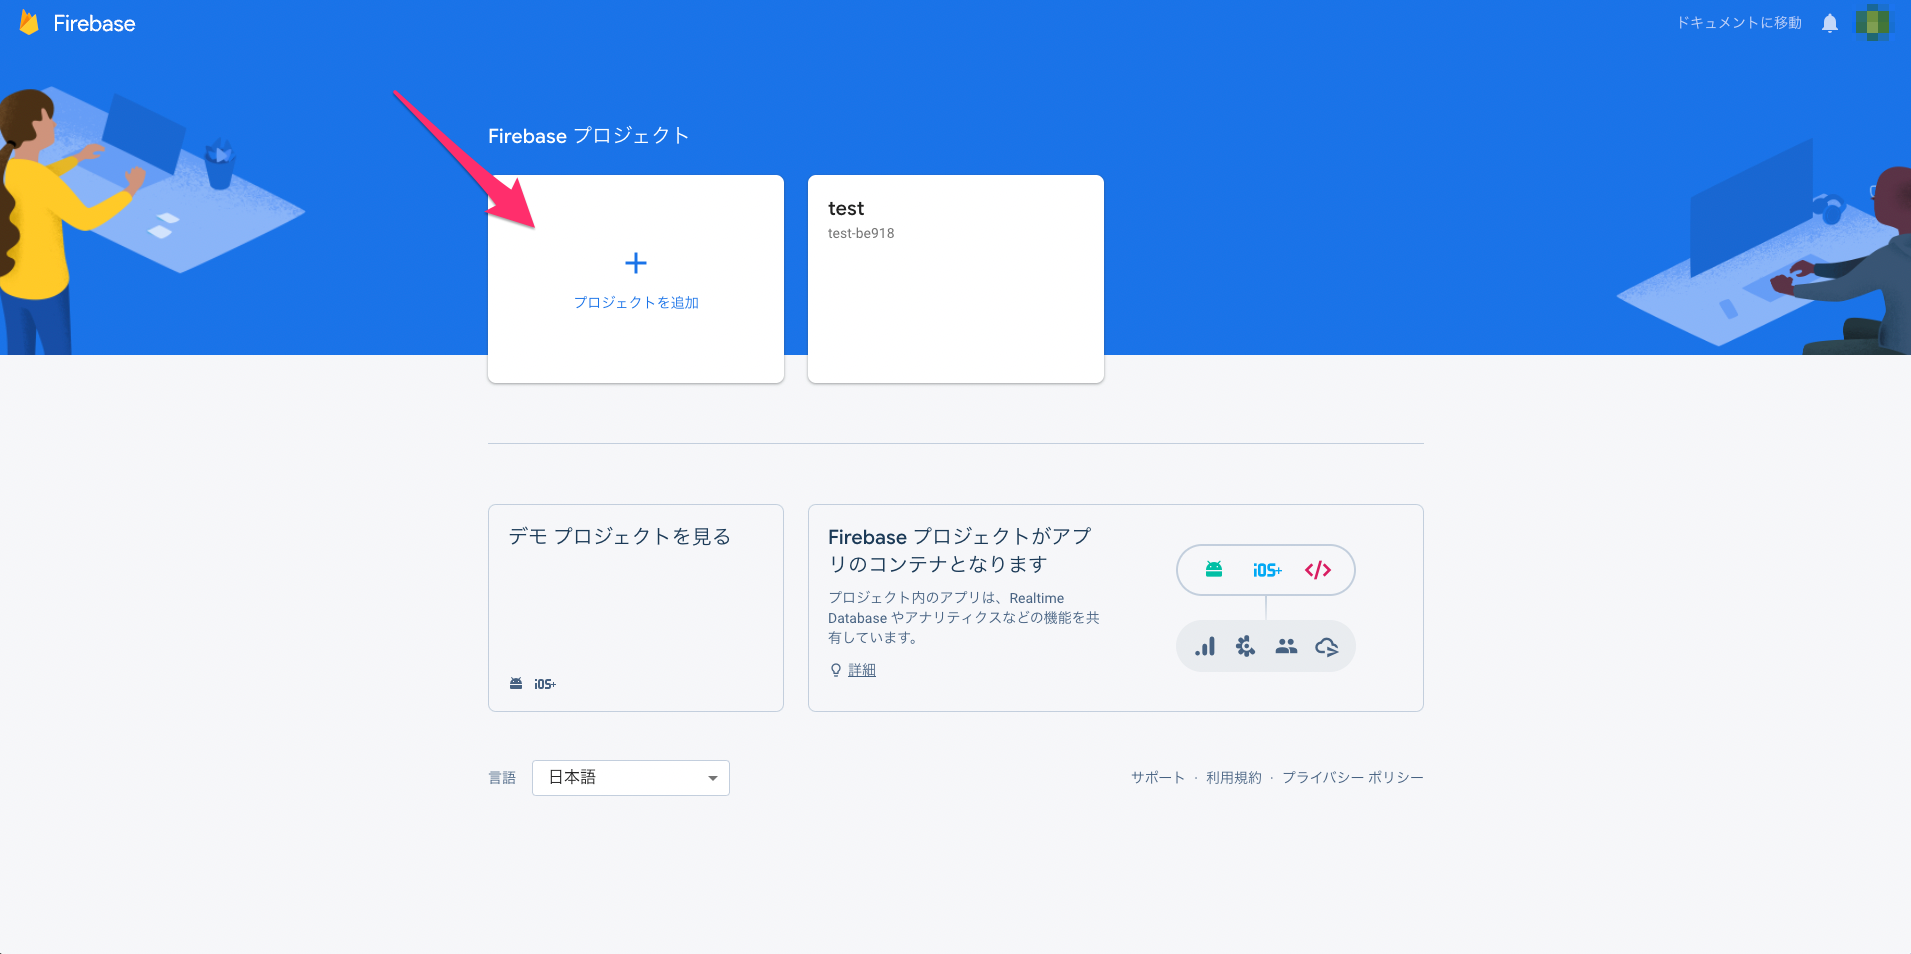

4. プロジェクトの作成画面(1/3) が表示されるので、プロジェクト名を入力し、`続行`をクリック
5. プロジェクトの作成(2/3) が表示されるので、Googleアナリティクスを有効にし、`続行`をクリック
6. プロジェクトの作成(3/3) が表示されるので、Googleアナリティクスアカウントを選択または作成し、`プロジェクトを作成`をクリック
7. 新しいプロジェクトの準備ができました、と表示されたら`続行`をクリック
8. 新しく作成したプロジェクトの概要が表示されるので`ウェブ`をクリック

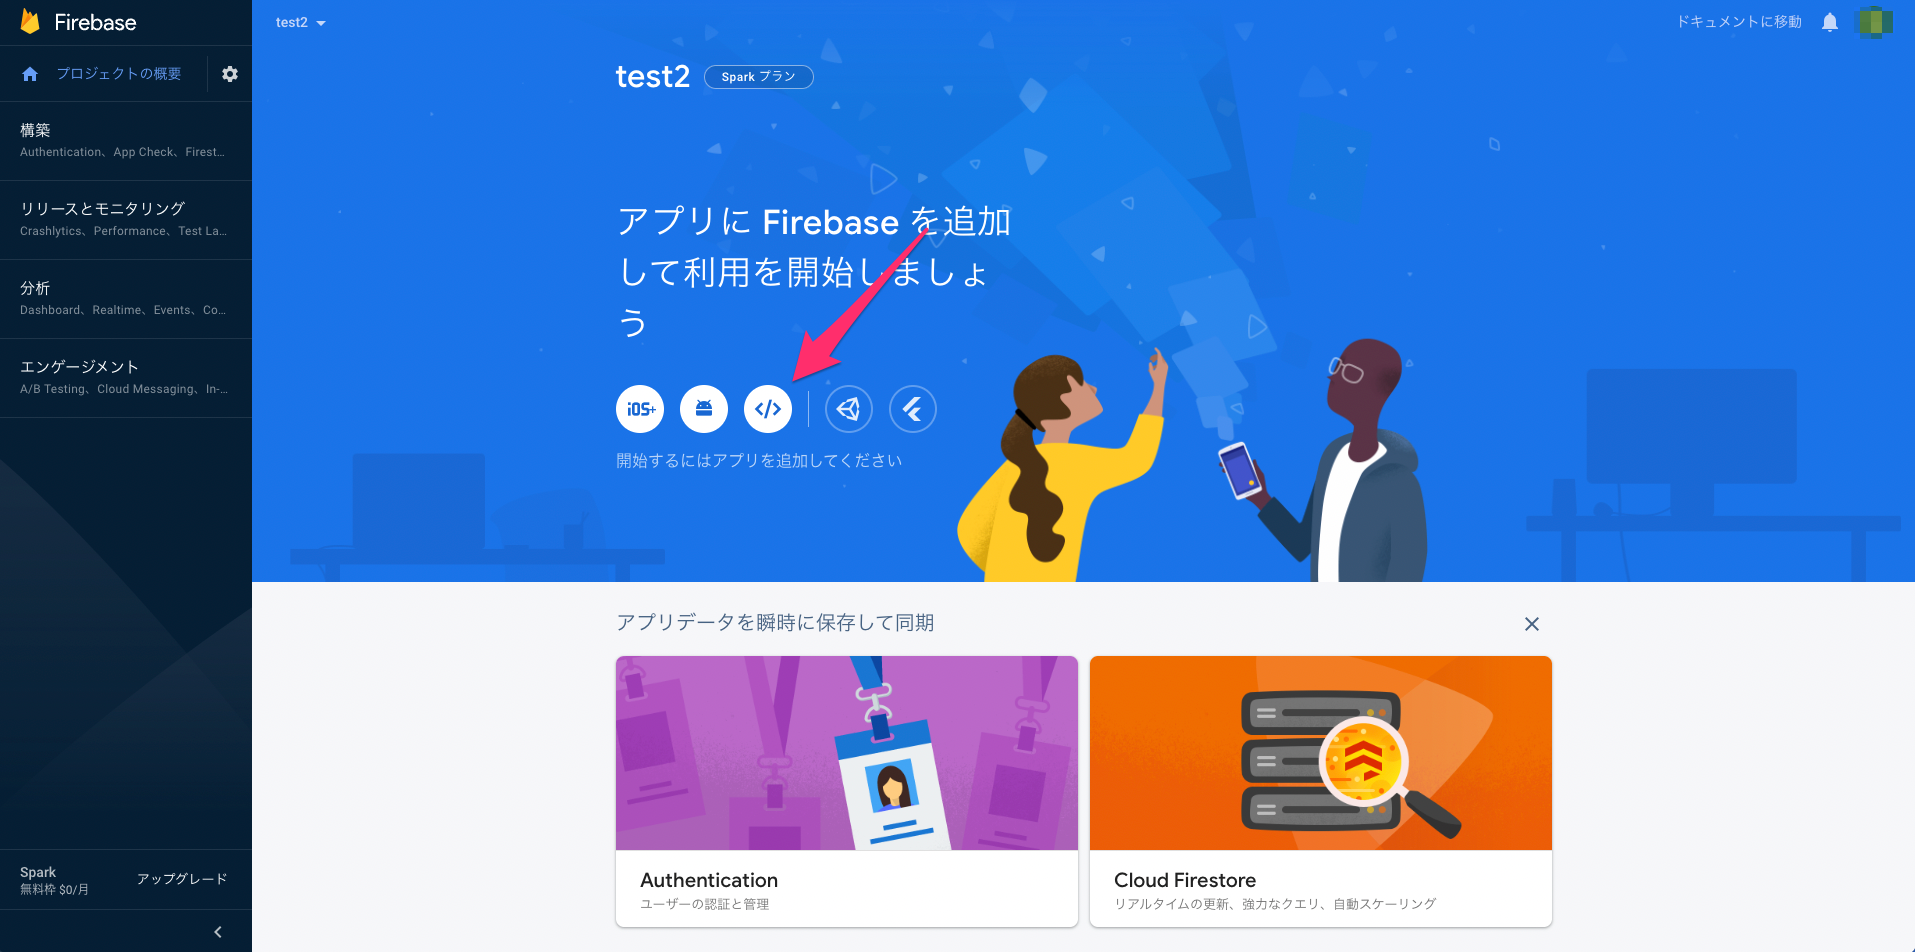

9. ウェブアプリへのFirebaseの追加が表示されるので、
  - アプリのニックネームに任意の名前を入力
  - `このアプリのFirebase Hosting も設定します`を選択
  - デプロイ先はデフォルトのままにする
10. 入力・設定できたら`アプリの登録`をクリック

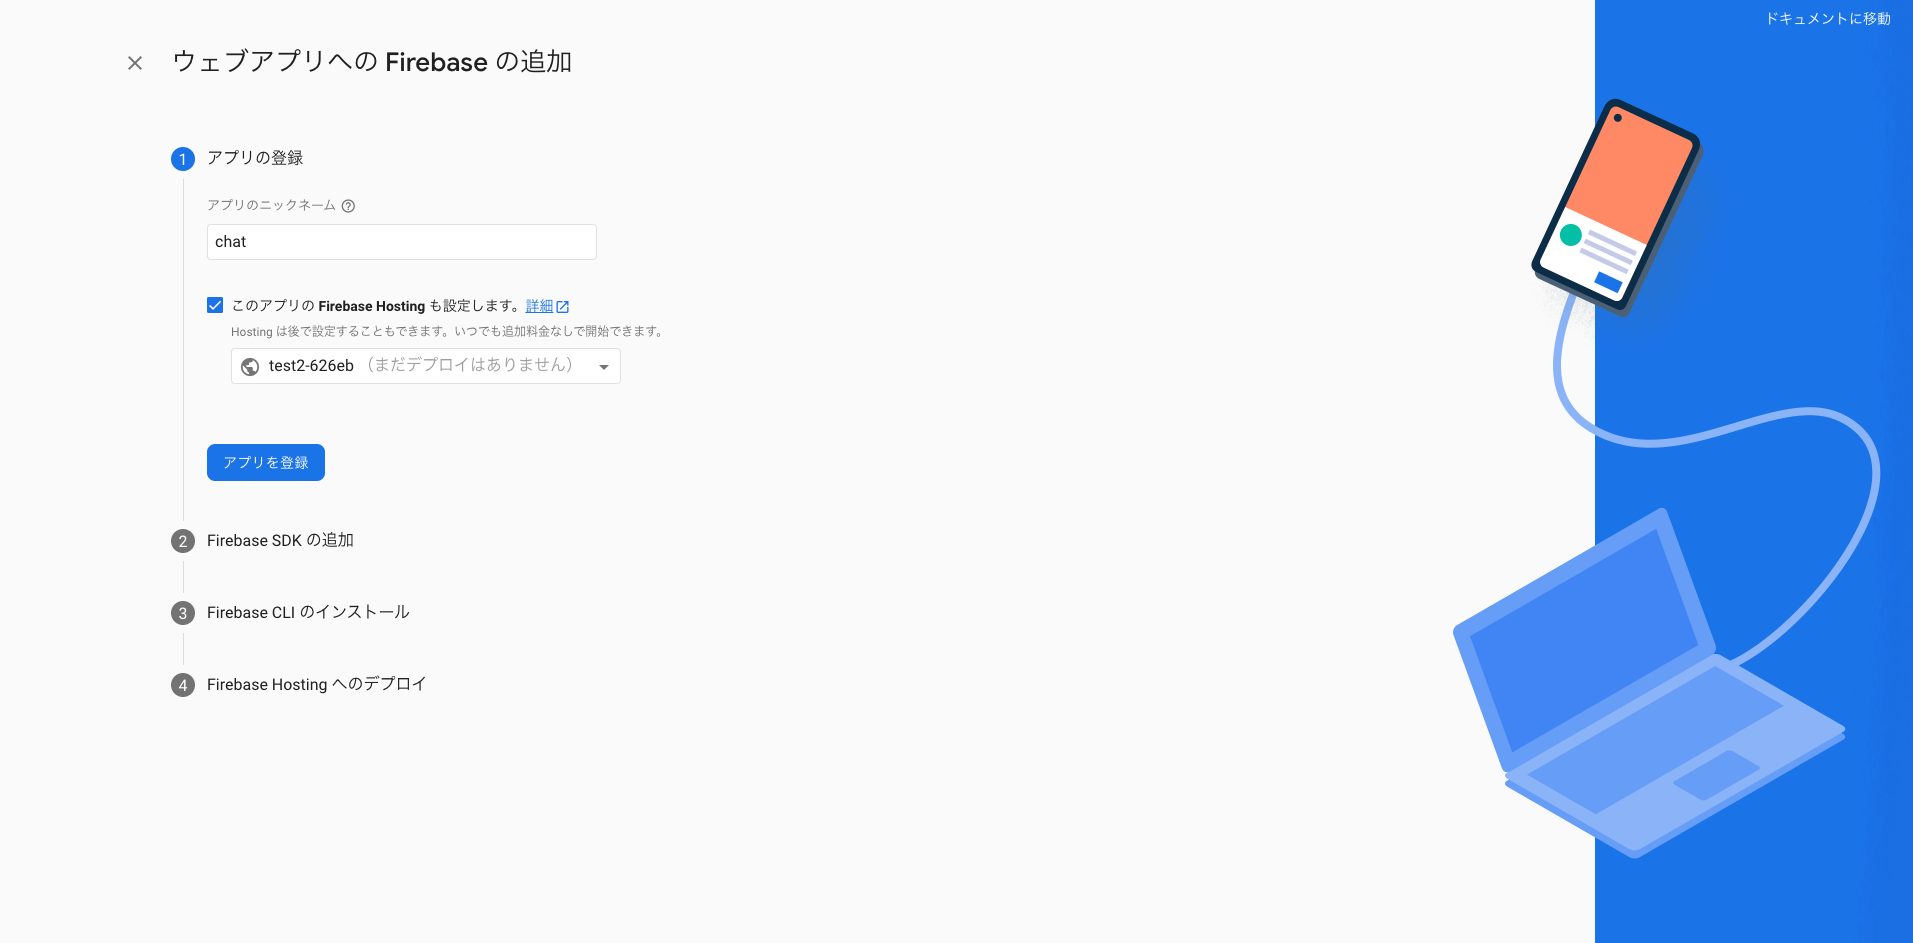

11. Firabase SDKの追加が表示されるので、
    - 今回は`<script>タグを選択する`をクリック
    - 表示されたスクリプトをコピーし、一旦適当なテキストファイルに保存しておく
12. スクリプトを保存したら`次へ`をクリック

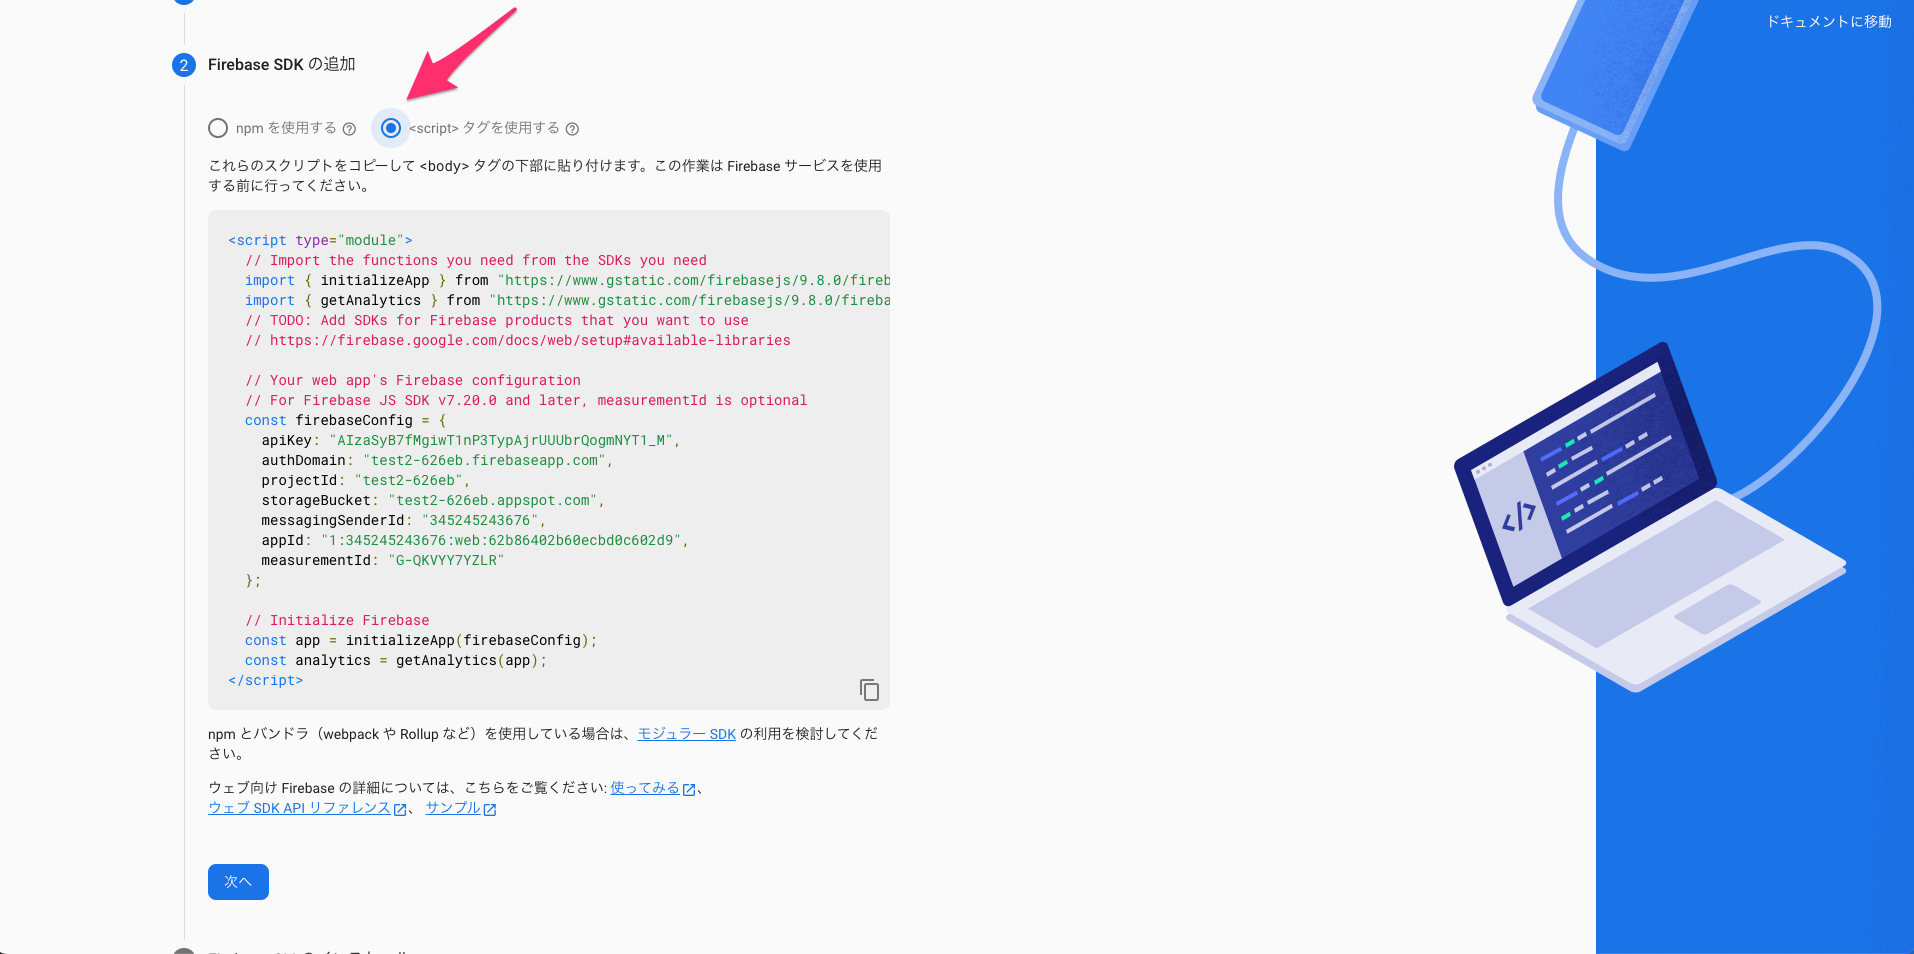

13. Firebase CLIのインストールが表示されるが、前回インストール済みなので、何もせず、`次へ`をクリック

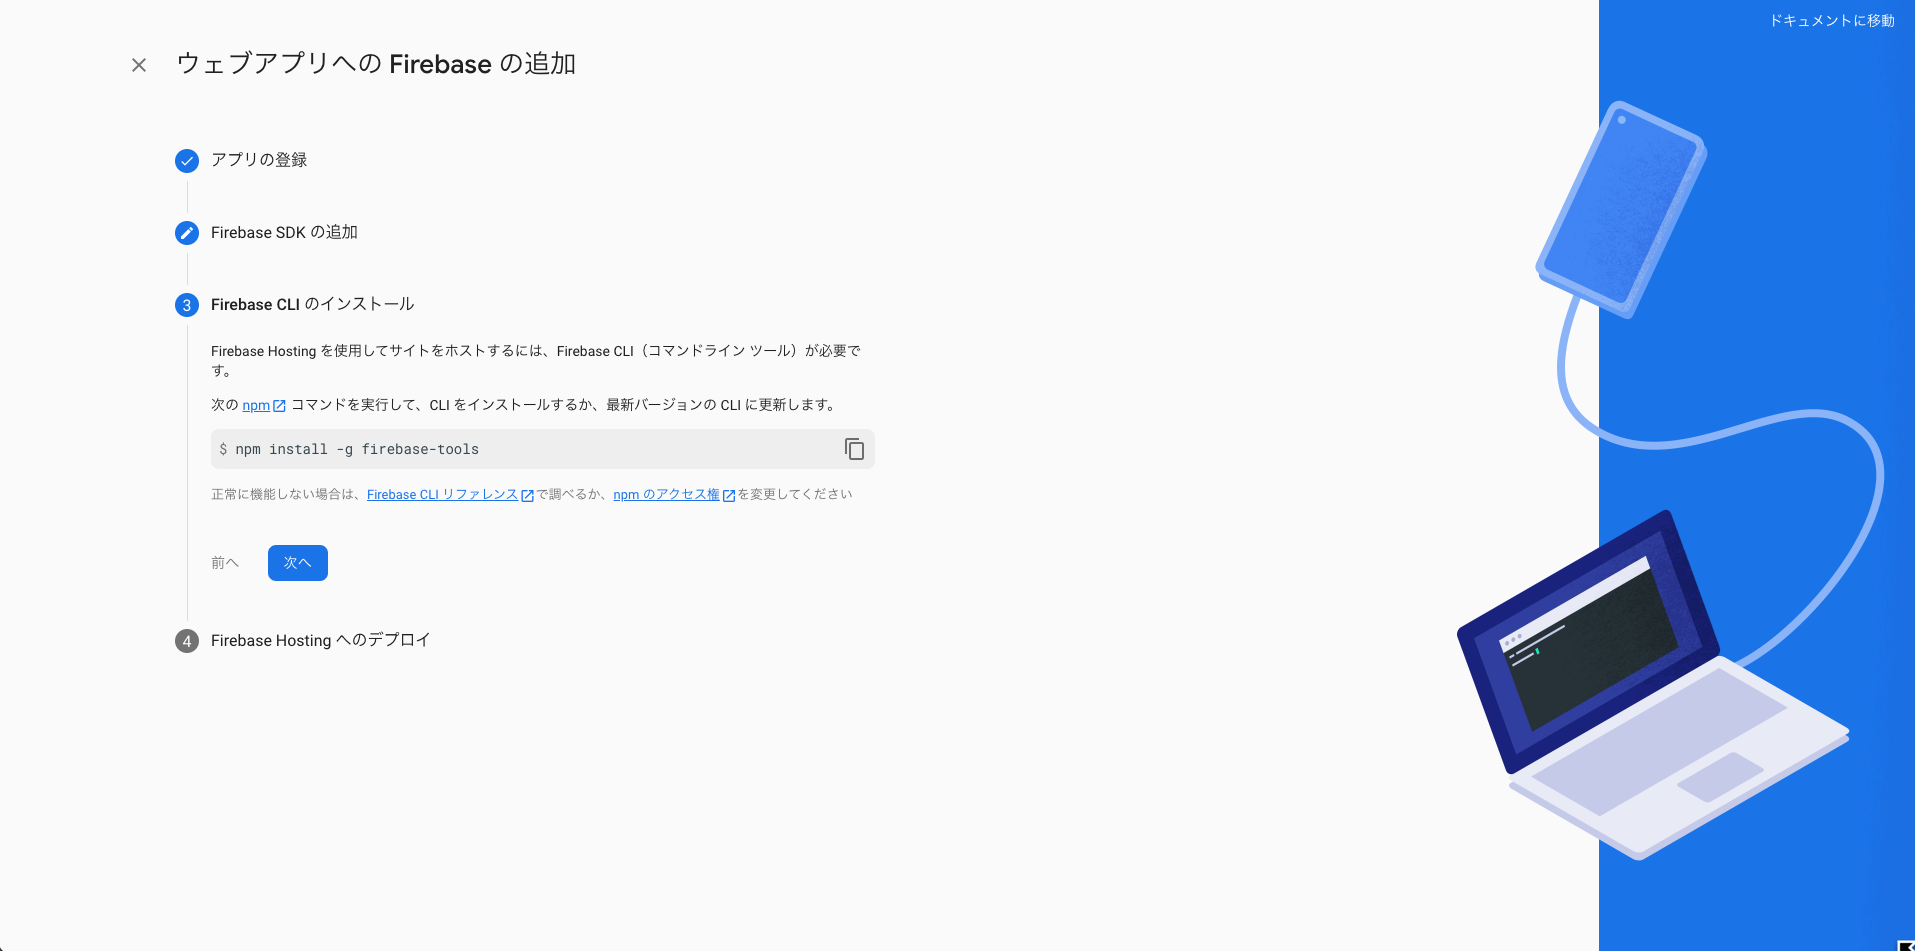

14. Firabase Hostingへのデプロイが表示されるが、後でやるので、`コンソールに進む`をクリック

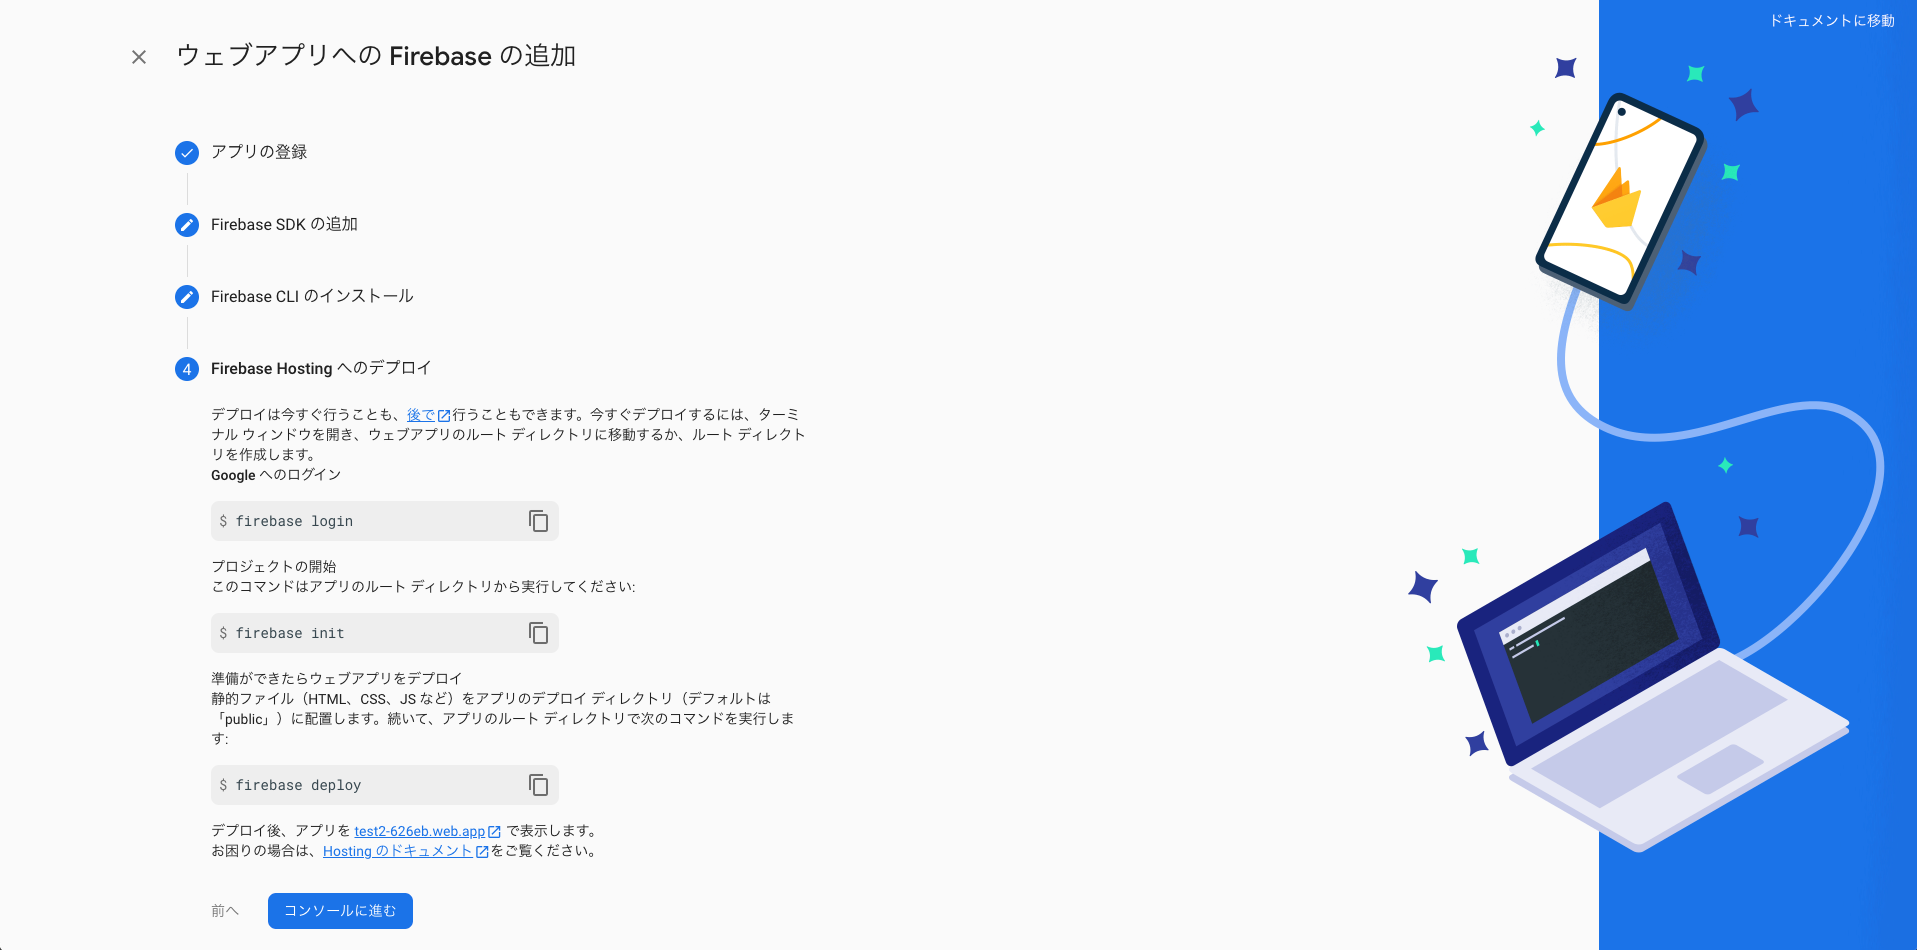

## データベースの作成

1. プロジェクトの概要画面で`構築 > Realtime Database`を選択


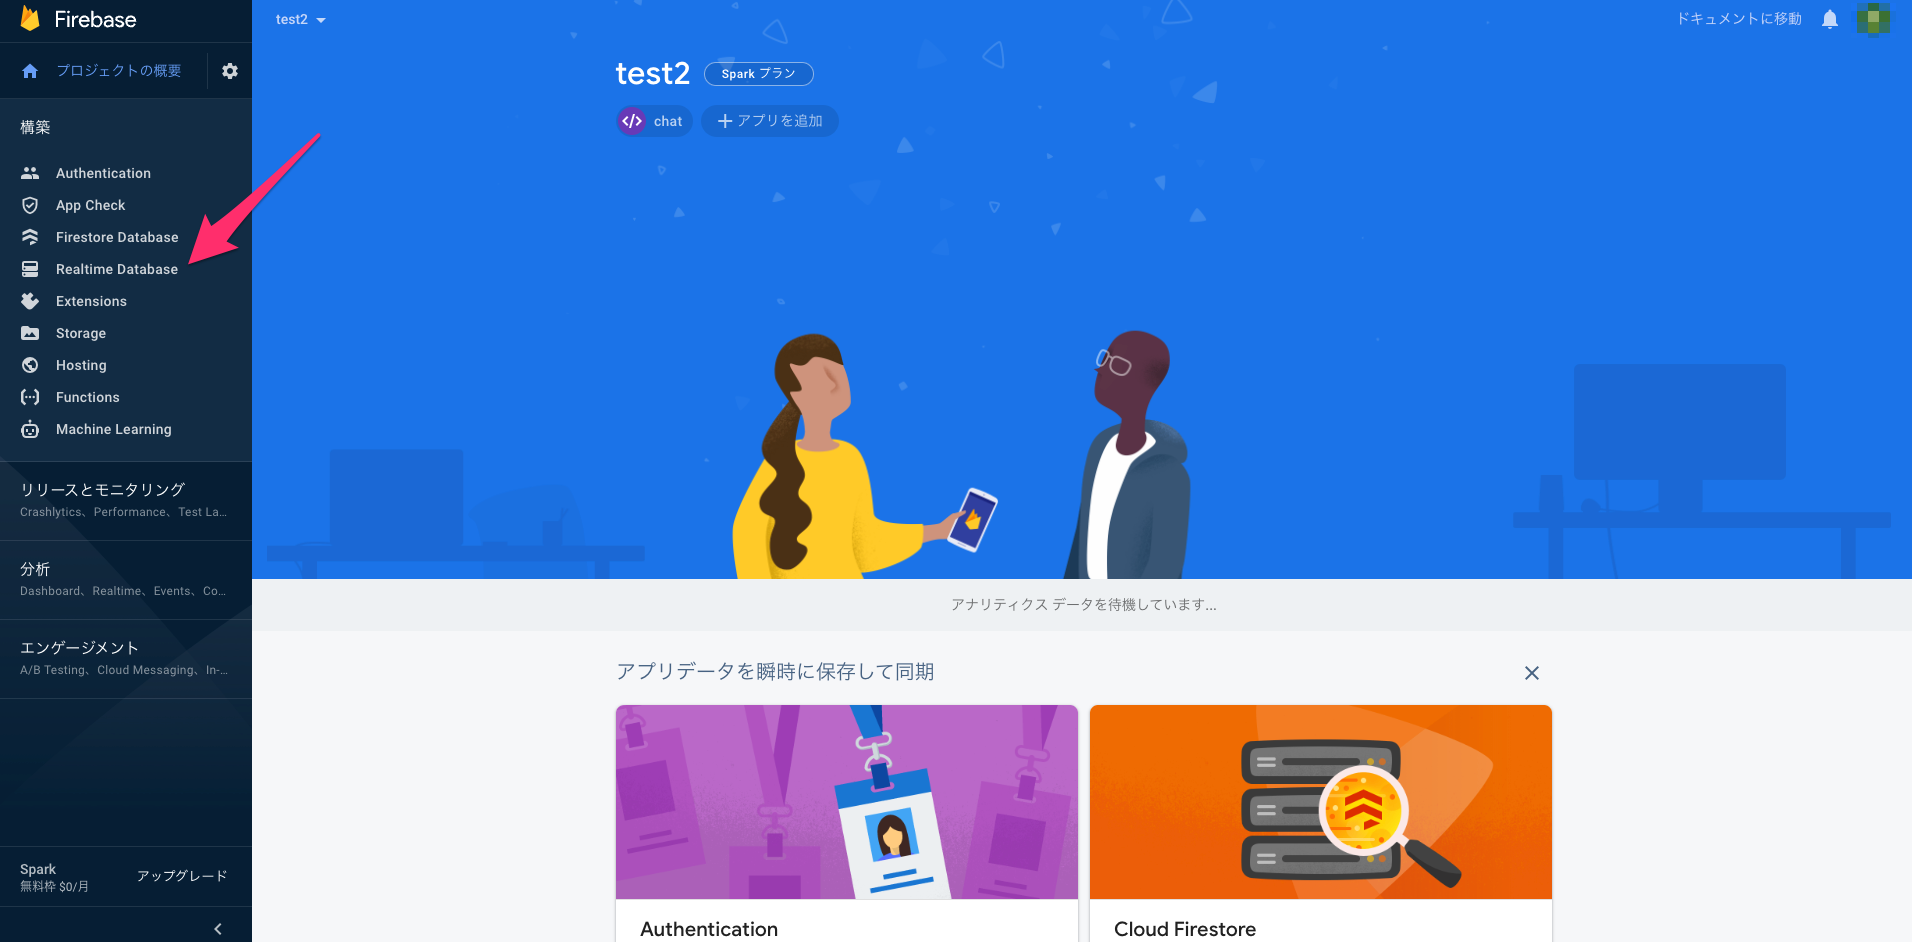

2. `データベースを作成`をクリック

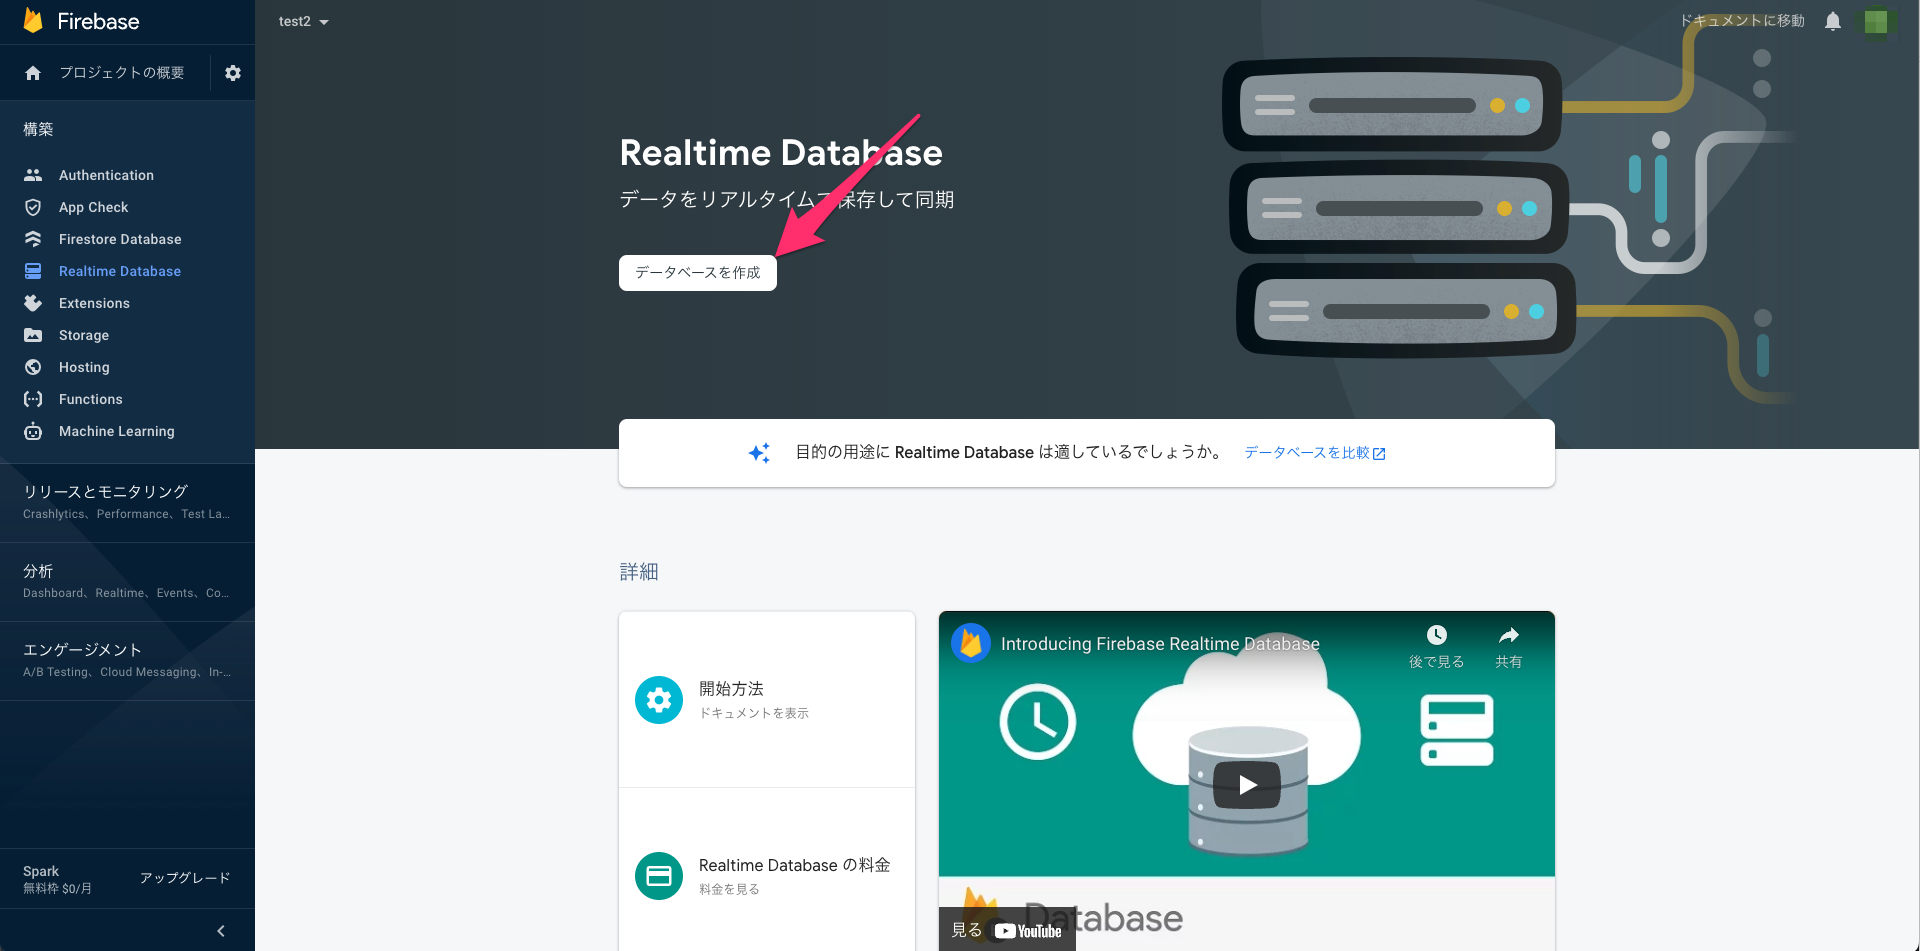

3. 任意のRealtime Databaseのロケーションを選択し、次へ
    - 今回は米国(us-central1)を選択した

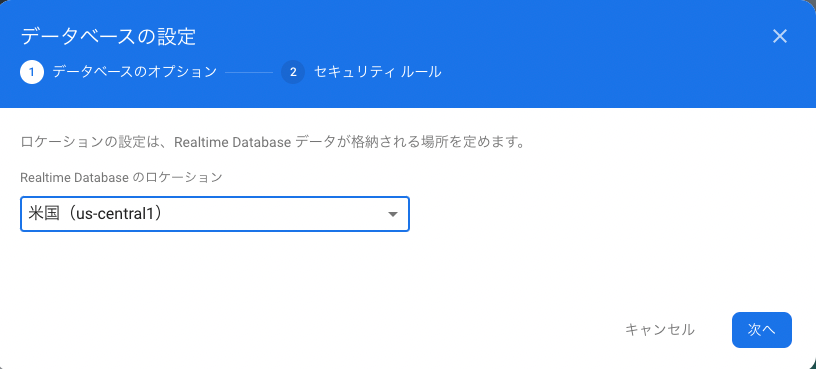

4. データベースのセキュリティルールは`テストモードで開始する`を選択し、`有効にする`をクリック

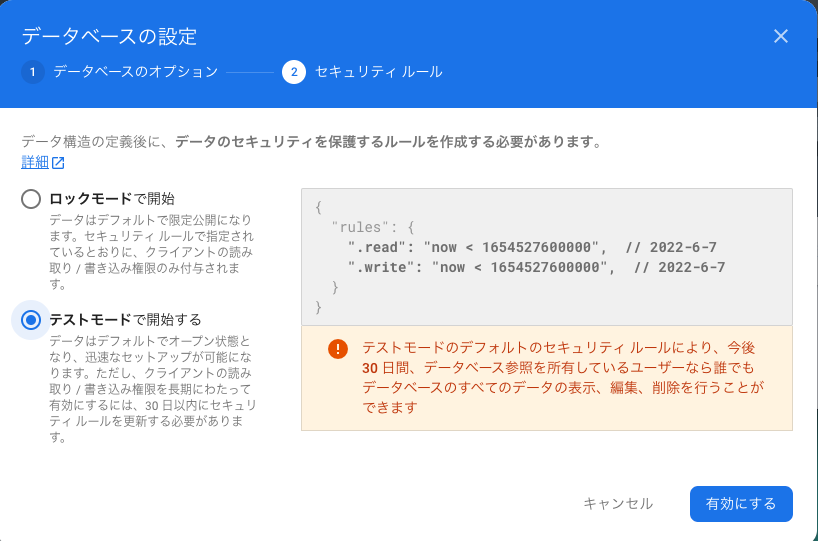

5. データベースが作成されたので、`ルール`タブを選択
6. read, writeを`true`に変更
7. `公開`をクリック

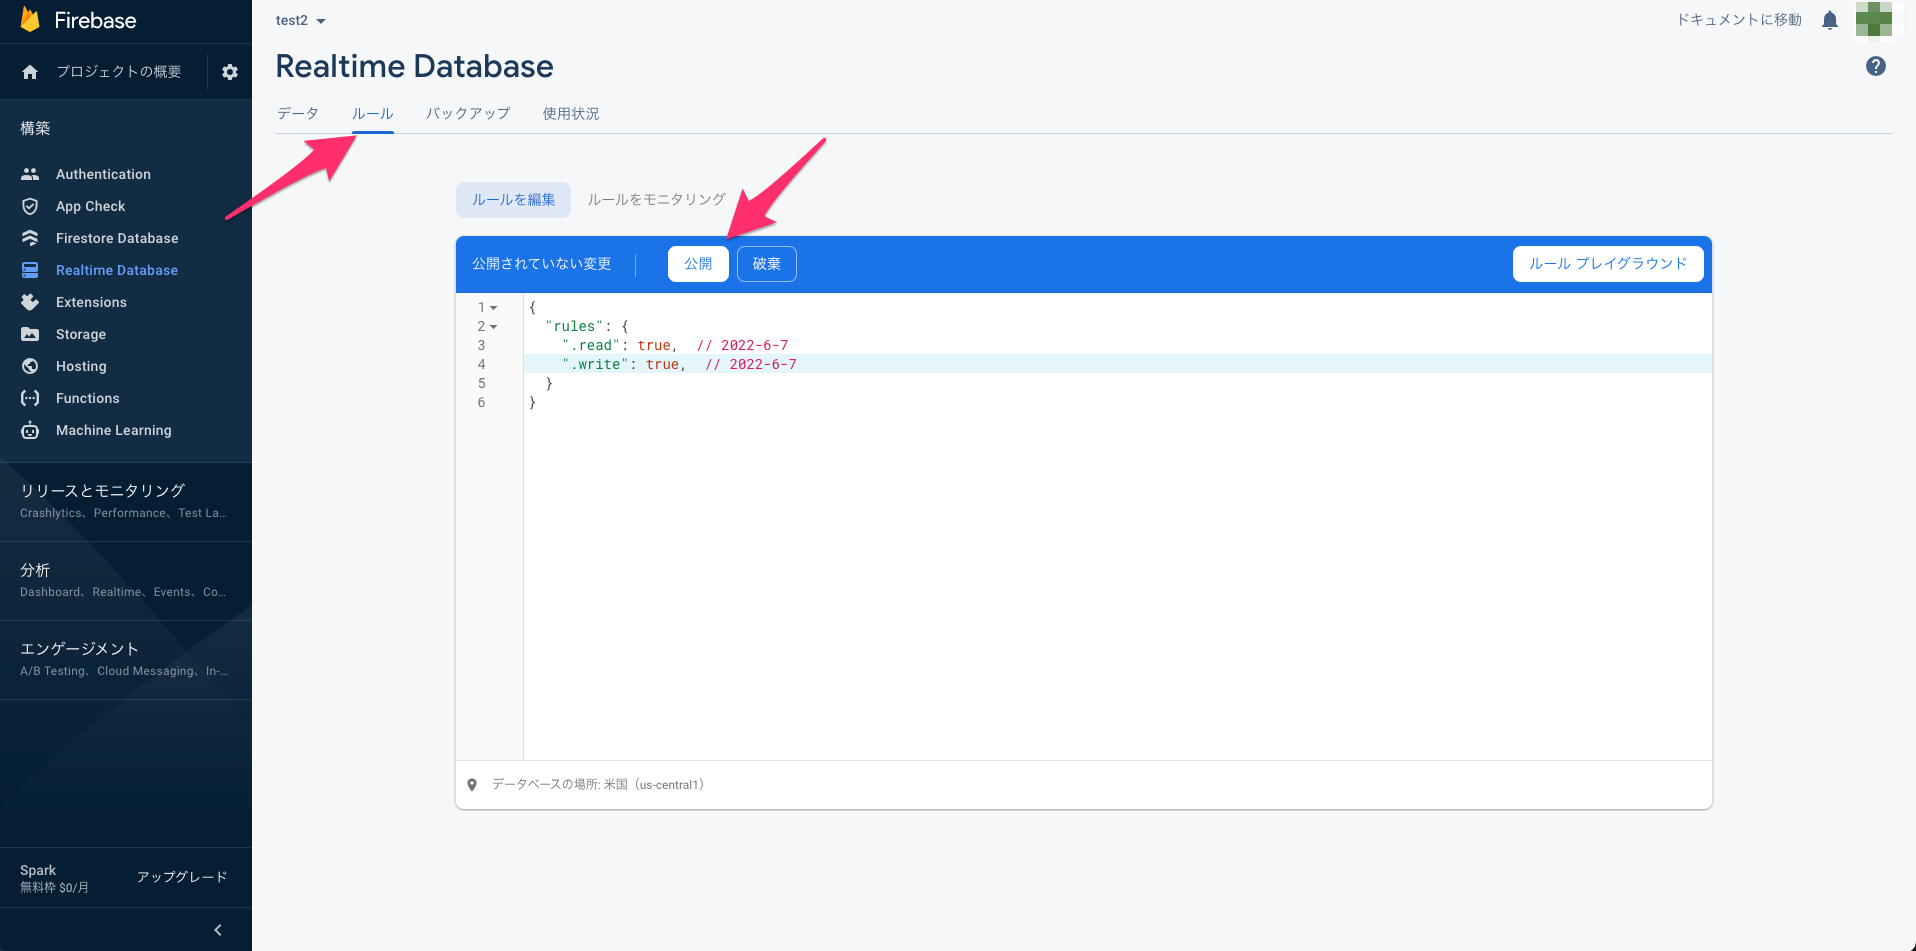

## ローカル環境の構築

`firebase login`は実行済みなので省略

1. 適当なディレクトリを作成し、そのディレクトリへ移動する

```
% mkdir chat-app
% cd chat-app
```

2. `firebase init`コマンドでディレクトリを初期化する
    - このディレクトリで使用するfirebaseの機能を聞かれる
    - 今回は以下の3つを選択する
        - `Hosting: Configure files for Firebase Hosting and (optionally) set up GitHub Action deploys`
        - `Emulators: Set up local emulators for Firebase products`
        - `Realtime Database: Configure a security rules file for Realtime Database and (optionally) provision default in
stance`

```
% firebase init

     ######## #### ########  ######## ########     ###     ######  ########
     ##        ##  ##     ## ##       ##     ##  ##   ##  ##       ##
     ######    ##  ########  ######   ########  #########  ######  ######
     ##        ##  ##    ##  ##       ##     ## ##     ##       ## ##
     ##       #### ##     ## ######## ########  ##     ##  ######  ########

You're about to initialize a Firebase project in this directory:

  <directory path>

? Which Firebase features do you want to set up for this directory? Press Space to select features, then Enter to
 confirm your choices. (Press <space> to select, <a> to toggle all, <i> to invert selection, and <enter> to proce
ed)
❯◯ Realtime Database: Configure a security rules file for Realtime Database and (optionally) provision default in
stance
 ◯ Firestore: Configure security rules and indexes files for Firestore
 ◯ Functions: Configure a Cloud Functions directory and its files
 ◯ Hosting: Configure files for Firebase Hosting and (optionally) set up GitHub Action deploys
 ◯ Hosting: Set up GitHub Action deploys
 ◯ Storage: Configure a security rules file for Cloud Storage
(Move up and down to reveal more choices)
```


3. プロジェクトへの関連付けを設定する
    - 今回は、最初に作成したプロジェクトに関連づけたいので、`Use an existing project`を選択する

```
=== Project Setup

First, let's associate this project directory with a Firebase project.
You can create multiple project aliases by running firebase use --add,
but for now we'll just set up a default project.

? Please select an option:
❯ Use an existing project
  Create a new project
  Add Firebase to an existing Google Cloud Platform project
  Don't set up a default project
```

4. 関連付けるプロジェクトを選択する

```
? Please select an option: Use an existing project
? Select a default Firebase project for this directory:
  test-be918 (test)
❯ test2-626eb (test2)
```


5. データベースのセットアップ
    - データベースのセキュリティルールのファイルを設定します
    - 今回はデフォルトのままにします

```
=== Database Setup
i  database: ensuring required API firebasedatabase.googleapis.com is enabled...
✔  database: required API firebasedatabase.googleapis.com is enabled


Firebase Realtime Database Security Rules allow you to define how your data should be
structured and when your data can be read from and written to.

? What file should be used for Realtime Database Security Rules? (database.rules.json)
```

6. 公開するディレクトリを設定する
    - 今回はデフォルト(public)のままにする

```
=== Hosting Setup

Your public directory is the folder (relative to your project directory) that
will contain Hosting assets to be uploaded with firebase deploy. If you
have a build process for your assets, use your build's output directory.

? What do you want to use as your public directory? (public)
```

7. SPA(single page application)用の設定を行うか否か
    - 今回はNを選択

```
? Configure as a single-page app (rewrite all urls to /index.html)? (y/N)
```

8. GitHubからの自動デプロイを設定するか否か
    - 今回はNを選択

```
? Set up automatic builds and deploys with GitHub? (y/N)
```

9. エミュレータのセットアップ
    - 今回は、以下の2つを選択する
        - Database Emulator
        - Hosting Emulator

```
=== Emulators Setup
? Which Firebase emulators do you want to set up? Press Space to select emulators, then Enter to confirm your cho
ices. (Press <space> to select, <a> to toggle all, <i> to invert selection, and <enter> to proceed)
❯◯ Authentication Emulator
 ◯ Functions Emulator
 ◯ Firestore Emulator
 ◯ Database Emulator
 ◯ Hosting Emulator
 ◯ Pub/Sub Emulator
 ◯ Storage Emulator
 ```

10. databaseエミュレータ、hostingエミュレータのポート設定
    - 今回はデフォルトのままにする

```
? Which port do you want to use for the database emulator? (9000)
? Which port do you want to use for the hosting emulator? (5000)
```

11. エミュレータのUI設定
    - 今回はデフォルトのままにする

```
? Would you like to enable the Emulator UI? Yes
? Which port do you want to use for the Emulator UI (leave empty to use any available port)?
```

12. 今すぐエミュレータをダウンロードするか
    - 今回はデフォルトのままにする

```
? Would you like to download the emulators now? (y/N)
```

13. 以上の設定を終えると、フォルダの初期化が行われる

```
i  Writing configuration info to firebase.json...
i  Writing project information to .firebaserc...
i  Writing gitignore file to .gitignore...

✔  Firebase initialization complete!
```

フォルダ内に、ファイル・フォルダが作成されている

```
% tree
.
├── database.rules.json
├── firebase.json
└── public
    ├── 404.html
    └── index.html
```

## ファイルを作成・編集する

### public/style.css

`public`ディレクトリに`style.css`を作成する

```
body {
    background-color: gainsboro;
}

h1 {
    color: coral;
    text-align: center;
}

div {
    text-align: center;
}

textarea {
    vertical-align:top;
}

#output {
    background-color: skyblue;
}
```

### public/index.js

`public`ディレクトリに`index.js`を作成する

```
var database = firebase.database();
let room = "chat_room";
const send = document.getElementById("send");
const name = document.getElementById("name");
const message = document.getElementById("message");
const output = document.getElementById("output");

//送信処理
send.addEventListener('click', function() {
    var now = new Date();
    database.ref(room).push({
        name: name.value,
        message: message.value,
        date: now.getFullYear() + '年' + now.getMonth()+1 + '月' + now.getDate() + '日' + now.getHours() + '時' + now.getMinutes() + '分'
    });
    message.value="";
    name.value="";
});

//受信処理
database.ref(room).on("child_added", function(data) {
    const v = data.val();
    const k = data.key;
    let str = "";
    str += '<div class="name">名前：'+v.name+'</div>';
    str += '<div class="text">日時：'+v.date+'</div>';
    str += '<div class="text">メッセージ：'+v.message+'</div><hr>';
    output.innerHTML += str;
});
```

### public/index.html

index.htmlを以下に書き換える

```
<!DOCTYPE html>  
<html lang="en">  
<head>  
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Chat App</title>

<!-- ここにアプリのscriptタグを貼り付けます。 -->

<link rel="stylesheet" href="./style.css">
</head>
<body>
    <h1>リアルタイムチャット</h1>
    <div>
        <div>
            Name<br><input type="text" id="name">
        </div>
        <br>
        <div>
            Message<br><textarea id="message" row="10"></textarea><br><br>
            <button id="send">send</button>
        </div>
        <hr>
        <div id="output"></div>
    </div>

<script src="./index.js"></script>

</body>
</html>
```

## エミュレータで動作確認する

エミュレータを実行

```
% firebase emulators:start
⚠  emulators: Support for Java version <= 10 will be dropped soon in firebase-tools@11. Please upgrade to Java version 11 or above to continue using the emulators.
i  emulators: Starting emulators: database, hosting
i  database: Database Emulator logging to database-debug.log
i  emulators: Shutting down emulators.
i  database: Stopping Database Emulator
i  hub: Stopping emulator hub

Error: TIMEOUT: Port 8089 on localhost was not active within 60000ms
```



エラーが出てしまう。

firebase-toolsのIssueによるとnode.js 16へのダウングレードが回避策の模様

[Error: TIMEOUT: Port 8080 on localhost was not active within 30000ms · Issue \#2379 · firebase/firebase\-tools](https://github.com/firebase/firebase-tools/issues/2379)

[ダウンロード \| Node\.js](https://nodejs.org/ja/download/)から16.15.0のパッケージをダウンロードして、インストールする

```
% node -v
v16.15.0
maruokatakashi@m1-Mac-mini chat-app % npm -v
8.5.5
```

もう一度エミュレータを実行

```
% firebase emulators:start
⚠  emulators: Support for Java version <= 10 will be dropped soon in firebase-tools@11. Please upgrade to Java version 11 or above to continue using the emulators.
i  emulators: Starting emulators: database, hosting
i  database: Database Emulator logging to database-debug.log
i  emulators: Shutting down emulators.
i  database: Stopping Database Emulator
i  hub: Stopping emulator hub
⚠  hosting: Port 5000 is not open on localhost, could not start Hosting Emulator.
⚠  hosting: To select a different host/port, specify that host/port in a firebase.json config file:
      {
        // ...
        "emulators": {
          "hosting": {
            "host": "HOST",
            "port": "PORT"
          }
        }
      }
i  emulators: Shutting down emulators.

Error: Could not start Hosting Emulator, port taken.
```

5000番portがコンフリクトしているので、firebase.jsonを編集し、hostingエミュレータのポートを8080に変更

```
  "emulators": {
    "database": {
      "port": 9000
    },
    "hosting": {
      "port": 8080
    },
    "ui": {
      "enabled": true
    }
```

もう一度エミュレータを実行

```
% firebase emulators:start
⚠  emulators: Support for Java version <= 10 will be dropped soon in firebase-tools@11. Please upgrade to Java version 11 or above to continue using the emulators.
i  emulators: Starting emulators: database, hosting
i  database: Database Emulator logging to database-debug.log
i  hosting: Serving hosting files from: public
✔  hosting: Local server: http://localhost:8080
i  ui: Emulator UI logging to ui-debug.log

┌─────────────────────────────────────────────────────────────┐
│ ✔  All emulators ready! It is now safe to connect your app. │
│ i  View Emulator UI at http://localhost:4000                │
└─────────────────────────────────────────────────────────────┘

┌──────────┬────────────────┬────────────────────────────────┐
│ Emulator │ Host:Port      │ View in Emulator UI            │
├──────────┼────────────────┼────────────────────────────────┤
│ Database │ localhost:9000 │ http://localhost:4000/database │
├──────────┼────────────────┼────────────────────────────────┤
│ Hosting  │ localhost:8080 │ n/a                            │
└──────────┴────────────────┴────────────────────────────────┘
  Emulator Hub running at localhost:4400
  Other reserved ports: 4500

Issues? Report them at https://github.com/firebase/firebase-tools/issues and attach the *-debug.log files.

⚠  emulators: Support for Java version <= 10 will be dropped soon in firebase-tools@11. Please upgrade to Java version 11 or above to continue using the emulators.
```

今度は起動できた

ブラウザでlocalhost:8080にアクセスすると、開発者コンソールに以下のエラーメッセージが出る。

```
Uncaught ReferenceError: database is not defined
    at index.js:20:1
```


色々と調べてみたが、参考にしたサイトのfirebasejsのバージョンが7、現在インストールされるバージョンが9と大きく違うので、簡単には解決できなさそう。

改めて、調査したいと思う。